In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
musicData=pd.read_csv("/Users/sasmita/Documents/PythonProjects/project-files-music-genre-classification-with-pca/music_dataset_mod.csv")
dataCopy= musicData.copy()
print(dataCopy.head)

<bound method NDFrame.head of           Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0    114.618354       57.976367       53.251766            99.061840   
1    116.672803       69.387087       95.787280            90.831033   
2    128.328121       52.930677       65.701187           104.439247   
3    128.511337       25.494755       14.095374            40.106130   
4    135.474190       45.174876      101.469872            70.002203   
..          ...             ...             ...                  ...   
995   66.578839       54.533872       99.782246            95.633310   
996  126.570862       57.812829       90.809940            64.880583   
997  121.731543       51.385204       33.849400            17.044544   
998   97.070804       19.210429       62.662860            22.720453   
999   71.050781       32.967250       62.875776            78.868747   

     String Instrument Detection  Electronic Element Presence  \
0                      14.686768        

In [16]:
print(dataCopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

# Getting the unique Genres

In [17]:
uniqueGenres= dataCopy.Genre.unique()
print(uniqueGenres)

['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']


# Counting the number of unique generes

In [18]:
print("Number of unique genres:", len(uniqueGenres))

Number of unique genres: 6


# Plotting the Genre distribution

<Axes: xlabel='Genre', ylabel='count'>

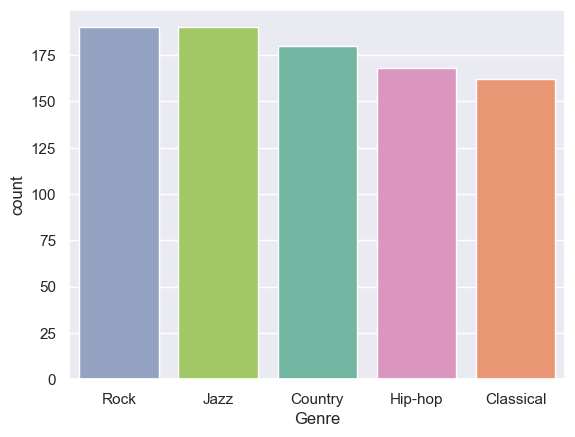

In [36]:
sns.countplot(x='Genre', hue='Genre', data=dataCopy, order=dataCopy['Genre'].value_counts().index, palette='Set2', legend=False)
#colour palettes 'viridis','husl', 'cubehelix', 'Set2'
#hue='Genre' makes each genre a unique color.
#legend=False hides redundant genre labels.

# Dropping all null values in the Genre column and splitting the data into training and test sets

In [38]:
data_cleaned= dataCopy.dropna(subset=['Genre'])
print(data_cleaned.head())

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

In [42]:
X= data_cleaned.drop(['Genre'],axis=1) #deleting the genere column
y= data_cleaned['Genre']

# Transforming categorical variables into numerical ones 

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
y_encoded=label_encoder.fit_transform(y)
data_cleaned['Genre_encoded']=y_encoded

/var/folders/qk/5jt0lkq97q18cm_lfkm3l2zr0000gn/T/ipykernel_28979/2004584163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Genre_encoded']=y_encoded


# Creating a new DataFrame where the original Genre column is replaced with the numeric Genre_encoded column.

In [52]:
data_prepared=data_cleaned.drop(columns=['Genre']).copy()
data_prepared['Genre_encoded']=y_encoded
print(data_prepared['Genre_encoded'])

0      1
1      0
2      4
3      2
4      1
      ..
973    2
996    0
997    4
998    4
999    3
Name: Genre_encoded, Length: 890, dtype: int64


# Generating the corelation matrix

In [46]:
correlation_matrix = data_prepared.corr()

# Visualizing the Correlation Matrix with a Heatmap

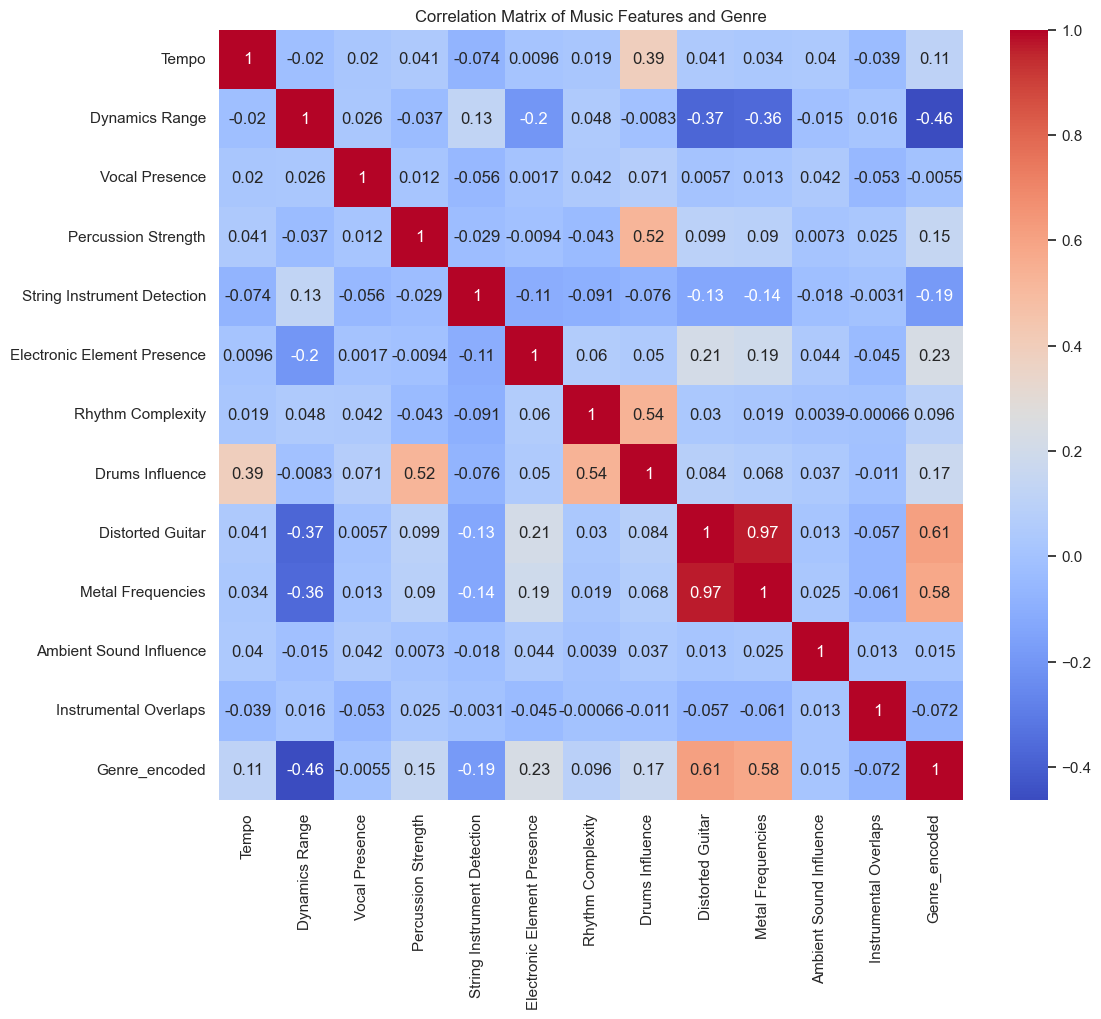

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Music Features and Genre')
plt.show()